In [90]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

import pydot as py
from keras.applications import VGG16

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

from tensorflow.keras.preprocessing import image

from tensorflow.keras.datasets import cifar10

import os
import zipfile

In [49]:
mnist = tf.keras.datasets.mnist

In [50]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [51]:
x_train = x_train.reshape(60000,784).astype('float32') / 255
x_test = x_test.reshape(10000,784).astype('float32') / 255

In [52]:
model_base = Sequential()
model_base.add( Dense( 64, activation='relu', input_shape=(784,) ) )
model_base.add( Dense( 64, activation='relu' ) )
model_base.add( Dense( 10, activation='softmax' ) )
model_base.summary()         

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
inputs = keras.Input( shape=(784,) )
inputs.shape

(None, 784)

In [54]:
inputs.dtype

'float32'

In [55]:
dense1 = Dense( 64, activation='relu' )(inputs)

In [56]:
dense2 = Dense( 64, activation='relu' )(dense1)
outputs = Dense( 10, activation='softmax' )(dense2)

In [57]:
model = Model( inputs=inputs, outputs=outputs )
model.summary()

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
plot_model( model, to_file='model.png', show_shapes=True, show_layer_names=True );

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [61]:
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics= ['accuracy']   )

In [62]:
model.fit( x_train,  y_train, epochs=5 )

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 803us/step - accuracy: 0.8573 - loss: 0.4834
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 797us/step - accuracy: 0.9618 - loss: 0.1288
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 801us/step - accuracy: 0.9732 - loss: 0.0902
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 800us/step - accuracy: 0.9785 - loss: 0.0680
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 797us/step - accuracy: 0.9828 - loss: 0.0549


In [63]:
model.evaluate( x_test, y_test )

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.9711 - loss: 0.0998


[0.08494018018245697, 0.9749000072479248]

In [66]:
def get_model():
    inputs = keras.Input(shape=(128,))
    outputs = Dense(1, activation='sigmoid')(inputs)
    return Model(inputs, outputs)

In [67]:
model1 = get_model()
model2 = get_model()
model3 = get_model()

In [68]:
inputs = keras.Input( shape=(128,) )

In [69]:
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)

In [70]:
outputs = layers.average( [y1, y2, y3] )

In [71]:
esemble_model = Model( inputs=inputs, outputs=outputs )
esemble_model.summary()

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14      │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_22       │ (None, 1)         │        129 │ input_layer_14[0… │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_23       │ (None, 1)         │        129 │ input_layer_14[0… │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_24       │ (None, 1)         │        129 │ input_layer_14[0… │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ average (Average)   │ (None, 1)         │          0 │ functional_22[0]… │
│                     │                   │            │ functional_23[0]… │
│                     │                   │            │ functional_24[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 387 (1.51 KB)

 Trainable params: 387 (1.51 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
plot_model( esemble_model, to_file='model.png', show_shapes=True, show_layer_names=True );

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [75]:
num_tags = 12
num_words = 10000
num_deparments = 4

In [76]:
title_input = keras.Input( shape=(None,), name='title'  )
body_input = keras.Input( shape=(None,), name='body'  )
tags_input = keras.Input( shape=(num_tags,), name='tags'  )

In [77]:
title_features = layers.Embedding( num_words, 64 )(title_input)
body_features = layers.Embedding( num_words, 64 )(body_input)

In [78]:
title_features = layers.LSTM( 128 )(title_features)
body_features = layers.LSTM( 32 )(body_features)

In [79]:
x = layers.concatenate( [title_features, body_features, tags_input] )

In [80]:
priority_pred = Dense( 1, activation='sigmoid', name='priority' )(x)

In [81]:
departament_pred = Dense( num_deparments, activation='softmax' )(x)

In [82]:
model = Model( inputs=[ title_input, body_input, tags_input ], outputs=[ priority_pred, departament_pred ] )

In [83]:
model.summary()

Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ title (InputLayer)  │ (None, None)      │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ body (InputLayer)   │ (None, None)      │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, None, 64)  │    640,000 │ title[0][0]       │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, None, 64)  │    640,000 │ body[0][0]        │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 128)       │     98,816 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 32)        │     12,416 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tags (InputLayer)   │ (None, 12)        │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 172)       │          0 │ lstm[0][0],       │
│ (Concatenate)       │                   │            │ lstm_1[0][0],     │
│                     │                   │            │ tags[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ priority (Dense)    │ (None, 1)         │        173 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_33 (Dense)    │ (None, 4)         │        692 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,392,097 (5.31 MB)

 Trainable params: 1,392,097 (5.31 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:
input_shape = (228,228,3)

model = Sequential()

In [85]:
model.add( Conv2D( 64, (3,3), activation='relu', input_shape=input_shape, padding='same' ) )
model.add( Conv2D( 64, (3,3), activation='relu', padding='same' ) )
model.add( MaxPooling2D( pool_size=(2,2), strides=(2,2)) )

model.add( Conv2D( 128, (3,3), activation='relu', padding='same' ) )
model.add( Conv2D( 128, (3,3), activation='relu', padding='same' ) )
model.add( MaxPooling2D( pool_size=(2,2), strides=(2,2)) )

model.add( Conv2D( 256, (3,3), activation='relu', padding='same' ) )
model.add( Conv2D( 256, (3,3), activation='relu', padding='same' ) )
model.add( Conv2D( 256, (3,3), activation='relu', padding='same' ) )
model.add( MaxPooling2D( pool_size=(2,2), strides=(2,2)) )

model.add( Conv2D( 512, (3,3), activation='relu', padding='same' ) )
model.add( Conv2D( 512, (3,3), activation='relu', padding='same' ) )
model.add( Conv2D( 512, (3,3), activation='relu', padding='same' ) )
model.add( MaxPooling2D( pool_size=(2,2), strides=(2,2)) )

model.add( Conv2D( 512, (3,3), activation='relu', padding='same' ) )
model.add( Conv2D( 512, (3,3), activation='relu', padding='same' ) )
model.add( Conv2D( 512, (3,3), activation='relu', padding='same' ) )
model.add( MaxPooling2D( pool_size=(2,2), strides=(2,2)) )

model.add( Flatten() )

model.add( Dense(4096, activation='relu' ) )
model.add( Dense(4096, activation='relu' ) )
model.add( Dense(1000, activation='sigmoid' ) )

C:\Users\jesus\anaconda3\envs\curso_IA\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [86]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 228, 228, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 228, 228, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 114, 114, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 114, 114, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 114, 114, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 57, 57, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 57, 57, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 57, 57, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 57, 57, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [88]:
model_1 = VGG16( weights='imagenet' )
model_1.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 63s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [91]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images/255.0, test_images/255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


In [92]:
class_names = [ 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck' ]

In [93]:
plt.figure( figsize=( 10,10 ) )

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

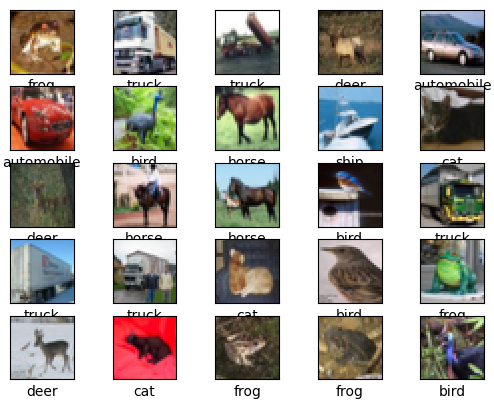

In [94]:
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow( train_images[i], cmap=plt.cm.binary )

    plt.xlabel( class_names[train_labels[i][0]] );

In [96]:
modelresnet50v2 = tf.keras.applications.ResNet50V2( include_top=True, weights=None, input_shape=(32,32,3),  classes=10 )

In [97]:
opt = tf.keras.optimizers.SGD(0.002)

In [98]:
modelresnet50v2.compile( loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'] )

In [100]:
history = modelresnet50v2.fit( train_images, train_labels, epochs=10, validation_data=(test_images, test_labels) )

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 213s 136ms/step - accuracy: 0.6850 - loss: 0.8915 - val_accuracy: 0.5554 - val_loss: 1.3098
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 215s 137ms/step - accuracy: 0.7030 - loss: 0.8419 - val_accuracy: 0.5993 - val_loss: 1.1843
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 218s 139ms/step - accuracy: 0.7245 - loss: 0.7737 - val_accuracy: 0.5900 - val_loss: 1.2354
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 228s 146ms/step - accuracy: 0.7523 - loss: 0.7073 - val_accuracy: 0.5828 - val_loss: 1.2898
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 221s 141ms/step - accuracy: 0.7686 - loss: 0.6586 - val_accuracy: 0.5820 - val_loss: 1.3205
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 217s 139ms/step - accuracy: 0.7878 - loss: 0.6089 - val_accuracy: 0.5915 - val_loss: 1.3015
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 221s 141ms/step - accuracy: 0.8010 - loss: 0.5655 - val_accuracy: 0.5953 - val_loss: 1.3193
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 219s 140ms/step - ac

In [103]:
history

{'accuracy': [0.6820799708366394,
  0.7021600008010864,
  0.721340000629425,
  0.7451800107955933,
  0.7605400085449219,
  0.7793800234794617,
  0.796459972858429,
  0.8124399781227112,
  0.8293799757957458,
  0.8412399888038635],
 'loss': [0.9015280604362488,
  0.8435686826705933,
  0.7855124473571777,
  0.7222848534584045,
  0.6776451468467712,
  0.6297836303710938,
  0.5766423344612122,
  0.5352884531021118,
  0.48775070905685425,
  0.4533045291900635],
 'val_accuracy': [0.555400013923645,
  0.5993000268936157,
  0.5899999737739563,
  0.5827999711036682,
  0.5820000171661377,
  0.5914999842643738,
  0.595300018787384,
  0.6014000177383423,
  0.5878999829292297,
  0.5809999704360962],
 'val_loss': [1.3098276853561401,
  1.184304118156433,
  1.2353696823120117,
  1.289842963218689,
  1.320479154586792,
  1.301507592201233,
  1.3192715644836426,
  1.3379589319229126,
  1.4087467193603516,
  1.4888410568237305]}

In [106]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

In [107]:
epochs = range( 1, len(acc)+1, 1 )
epochs

range(1, 11)

<Figure size 640x480 with 0 Axes>

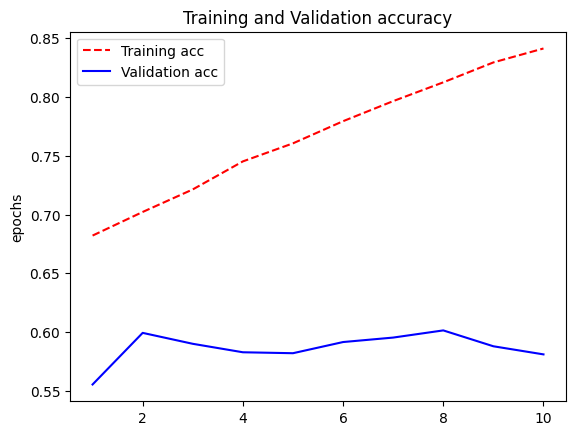

<Figure size 640x480 with 0 Axes>

In [108]:
plt.plot(epochs, acc, 'r--', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title( 'Training and Validation accuracy' )
plt.ylabel('acc')
plt.ylabel('epochs')

plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

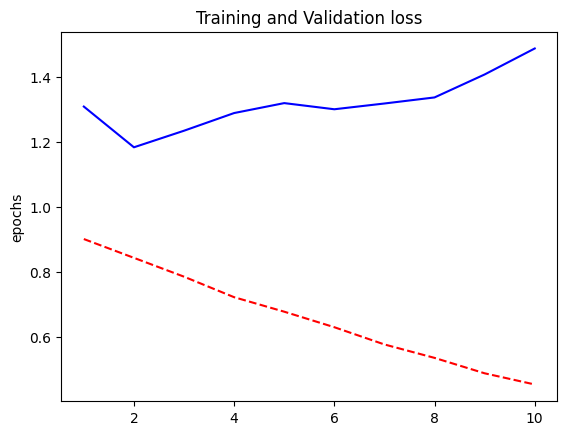

<Figure size 640x480 with 0 Axes>

In [109]:
plt.plot(epochs, loss, 'r--')
plt.plot(epochs, val_loss, 'b') 
plt.title( 'Training and Validation loss' )
plt.ylabel('acc')
plt.ylabel('epochs')

plt.figure()

In [110]:
modelresnet50v2pre = Sequential()

modelresnet50v2pre.add(  tf.keras.applications.ResNet50V2( include_top=False, weights='imagenet',  pooling='avg', input_shape=(32,32,3) )  )

modelresnet50v2pre.add( Dense( 10, activation='softmax' ) )

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


In [111]:
opt = tf.keras.optimizers.SGD(0.002)

In [112]:
modelresnet50v2pre.compile( loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'] )

In [113]:
history = modelresnet50v2pre.fit( train_images, train_labels, epochs=10, validation_data=(test_images, test_labels) )

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 225s 140ms/step - accuracy: 0.2595 - loss: 2.0936 - val_accuracy: 0.5209 - val_loss: 2.4033
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 213s 136ms/step - accuracy: 0.5410 - loss: 1.3733 - val_accuracy: 0.5778 - val_loss: 1.5890
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 217s 139ms/step - accuracy: 0.6220 - loss: 1.1342 - val_accuracy: 0.6370 - val_loss: 1.4628
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 218s 139ms/step - accuracy: 0.6779 - loss: 0.9669 - val_accuracy: 0.6671 - val_loss: 1.1347
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 218s 139ms/step - accuracy: 0.7093 - loss: 0.8764 - val_accuracy: 0.7070 - val_loss: 2.1502
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 220s 141ms/step - accuracy: 0.7405 - loss: 0.7799 - val_accuracy: 0.7122 - val_loss: 2.0976
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 218s 139ms/step - accuracy: 0.7615 - loss: 0.7131 - val_accuracy: 0.7338 - val_loss: 1.6510
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 221s 142ms/step - ac

In [114]:
history = history.history
history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [116]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

In [117]:
epochs = range( 1, len(acc)+1, 1 )
epochs

range(1, 11)

<Figure size 640x480 with 0 Axes>

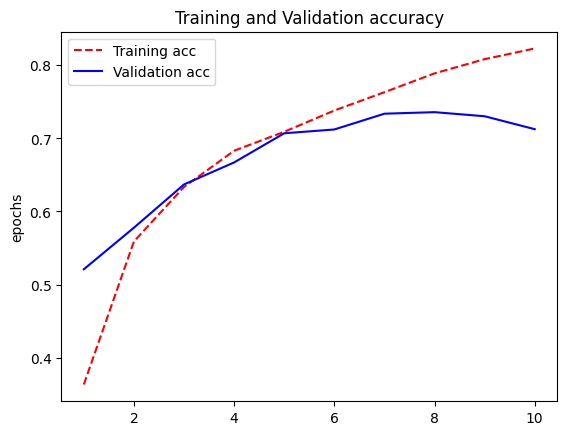

<Figure size 640x480 with 0 Axes>

In [118]:
plt.plot(epochs, acc, 'r--', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title( 'Training and Validation accuracy' )
plt.ylabel('acc')
plt.ylabel('epochs')

plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

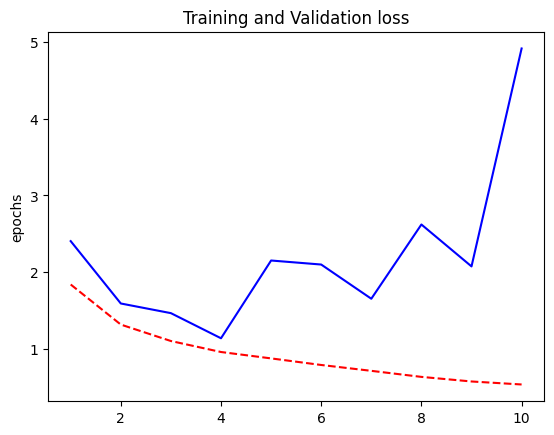

<Figure size 640x480 with 0 Axes>

In [119]:
plt.plot(epochs, loss, 'r--')
plt.plot(epochs, val_loss, 'b') 
plt.title( 'Training and Validation loss' )
plt.ylabel('acc')
plt.ylabel('epochs')

plt.figure()

In [ ]:
model = Sequential()

model.add(  VGG16( include_top=False, weights='imagenet',  pooling='avg', input_shape=(32,32,3) )  )

model.add( Dense( 10, activation='softmax' ) )

In [ ]:
opt = tf.keras.optimizers.SGD(0.002)

In [ ]:
model.compile( loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'] )

In [ ]:
history = model.fit( train_images, train_labels, epochs=10, validation_data=(test_images, test_labels) )

In [ ]:
history = history.history
history.keys()

In [ ]:
acc = history'acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']

In [ ]:
epochs = range( 1, len(acc)+1, 1 )
epochs

In [ ]:
plt.plot(epochs, acc, 'r--', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title( 'Training and Validation accuracy' )
plt.ylabel('acc')
plt.ylabel('epochs')

plt.legend()
plt.figure()

In [ ]:
plt.plot(epochs, loss, 'r--')
plt.plot(epochs, val_loss, 'b') 
plt.title( 'Training and Validation loss' )
plt.ylabel('acc')
plt.ylabel('epochs')

plt.figure()